#### 데이터 분석에서 확률이 사용되는 곳
1. 데이터 자체의 값이 어떤 특성을 가지는지를 표현하기 위한 수단 (빈도주의적 관점)
2. 데이터로부터 얻은 법칙이나 규칙을 표현하기 위한 수단 (베이지안 관점)

# 1. 확률적 데이터
* 결정론적 데이터와 확률적 데이터
    * 결정론적 데이터(deterministic data) : 항상 같은 값이 나오는 데이터
    * 확률적 데이터(random data, probabilistic data, stochastic data) : 예측할 수 없는 값이 나오는 데이터
* 우리가 다루는 대부분의 데이터는 확률적 데이터이다.

#### 데이터가 확률적이 되는 이유
* 대상을 특정하지 않고 넓은 범위의 대상을 목표로 하기 때문
* 여러가지 조건, 상황에 따라 데이터의 값이 영향을 받을 수 있다.
* 측정 시에 발생하는 오차 때문일 수 있다.

# 2. 분포와 기술통계
* 분포(distribution) : 확률적 데이터에서 어떠한 값이 자주 나오고 어떠한 값이 드물게 나오는가를 나타내는 특성
    * 흔히 히스토그램(histogram)을 사용해 표현
* 기술통계(descriptive stastics) : 분포의 특징을 나타내는 어떤 숫자를 계산하여 그 숫자로서 분포를 표현하는 것
* 대표적인 기술통계
    * 표본평균, 표본중앙값, 표본최빈값
    * 표본분산, 표본표준편차
    * 표본왜도, 표본첨도

# 3. 표본평균
* 확률적인 데이터의 값을 대표하는 척도 중 하나
* 보통 데이터의 평균(mean, average)이라고 부르는 값의 정확한 명칭은 표본평균(sample mean, sample average)이다.
* m 또는 ￣x(엑스바)로 표시
$$ m = ￣x = 1/N∑(i=1～N)x_i $$
    * N : 자료의 갯수, i : 자료의 순서(index)

# 4. 표본중앙값
* 표본중앙값(sample median) : 전체 자료를 크기별로 정렬했을 때 가장 중앙에 위치하는 값
* 전체 표본 갯수가 N인 경우
    * N이 홀수이면 : 중앙값은 (n + 1)/2 번째 표본의 값
    * N이 짝수이면 : n/2 번째 표본의 값과 n/2 + 1 번째 표본의 값의 평균

# 5. 표본최빈값
* 표본최빈값(most frequent value, sample mode) : 데이터 값 중 가장 빈번하게 나오는 값
* 연속적인 값의 경우 일정구간 간격으로 나누어 가장 많은 데이터를 가진 구간의 대표값을 그 데이터의 최빈값으로 가정하는 방법을 많이 사용한다.
    * 구간을 어떻게 나누는가에 따라 달라질 수 있기 때문에 신뢰할 수 있는 방법은 아님

# 6. 파이썬을 사용한 대표값 계산
##### mean
표본평균 계산
##### median
표본중앙값 계산
##### argmax
이산데이터의 표본최빈값 계산
##### histogram
데이터를 구간으로 나누어 각 구간에 들어가는 데이터 갯수 계산

In [3]:
import numpy as np

np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

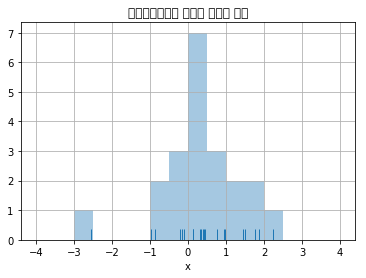

In [5]:
# 0.5 간격 구간을 가진 -4 ~ 4 값을 가진 데이터의 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt

bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.grid()
plt.show()

In [6]:
print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


In [7]:
# 최빈구간
m = x[np.argmax(x)] # 연속데이터에 대한 최빈값은 의미없는 숫자
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈값 = {}, 최빈구간 = {} ~ {}".format(m, bins[m_bin], bins[m_bin + 1]))

최빈값 = 2.240893199201458, 최빈구간 = 0.0 ~ 0.5


In [8]:
ns

array([0, 0, 1, 0, 0, 0, 2, 3, 7, 3, 2, 2, 1, 0, 0, 0], dtype=int64)

In [9]:
_

array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
        1.5,  2. ,  2.5,  3. ,  3.5,  4. ])

In [10]:
m_bin

8

# 7. 평균, 중앙값, 최빈값의 차이
* 분포 모양에 따른 표본평균, 표본중앙값, 표본최빈값의 특성
    * 분포가 표본평균을 기준으로 대칭이면(symmetric) 표본중앙값 = 표본평균
    * 분포가 대칭이고 하나의 최고값만을 가지면(uni-modal) 표본최빈값 = 표본평균
    * 대칭인 분포를 비대칭으로 만드는 데이터가 더해지면 보통 표본평균이 가장 크게 영향을 받고 표본최빈값이 가장 적게 영향을 받는다.

x 길이 :  1050
x:
 [ 1.62434536 -0.61175641 -0.52817175 ...  5.          5.
  5.        ]


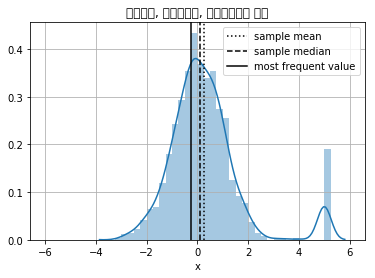

In [19]:
# 대칭 분포에 비대칭으로 만드는 데이터가 더해졌을 때 표본평균, 표본중앙값, 표본최빈값
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 +1)

print("x 길이 : ",len(x))
print("x:\n", x)
sns.distplot(x, bins=bins)
plt.axvline(np.mean(x), c='k', ls=":", label="sample mean")
plt.axvline(np.median(x), c='k', ls="--", label="sample median")
ns, _ = np.histogram(x, bins=bins)
plt.axvline(bins[np.argmax(ns)], c='k', ls="-", label="most frequent value")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()

# 8. 분산과 표준편차
* 표본분산(sample variance), 표본표준편차(sample standard deviation) : 데이터가 얼마나 변동(variation)하고 있는지 알려주는 특징값
* 평균, 기댓값 : 분포의 위치를 대표하는 값  
분산 : 분포의 폭(width)을 대표하는 값
* 표준편차 : 분산에 대한 양의 제곱근(square root)
$$ 표준편차 = √분산 $$
* 표본분산
$$ s^2 = 1/N∑(i=1～N)(x_i - ￣x)^2 $$
    * ￣x : 표본평균
    * 자료값과 평균 사이의 거리를 의미
    * 음수값 때문에 제곱
* 분포가 하나의 대표값 근처에 모여있다면 대부분 데이터는 "대표값 ± 표준편차" 범위 안에 있다.
* 위에서 구한 표본분산은 정확히 말하면 편향오차를 가진 편향 표본분산(biased sample variance)
* 비편향 표본분산(unbiased sample variance)
$$ s^2(unbiased) = 1/(N - 1)∑(i=1～N)(x_i-￣x)^2 $$

##### var
표본분산을 구한다.

##### std
표본표준편차를 구한다.

##### ddof 인수
비편향 표본분산과 표본표준편차를 구할 수 있다.

In [21]:
import scipy as sp

sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000) # 평균=0, 표준편차=2 인 정규분포 데이터 생성

np.var(x), np.std(x) # 편향 표본분산, 표본표준편차

(3.896937825248617, 1.9740663173380515)

In [23]:
np.var(x, ddof=1), np.std(x, ddof=1) # 비편향 표본분산, 표본표준편차

(3.900838663912529, 1.9750540913890255)

# 9. 표본비대칭도
표본비대칭도(sample skewness) : 평균과의 거리의 세제곱을 이용하여 구한 특징값
$$ \{1/N∑(i=1～N)(x_i - ￣x)^3\} / √\{1/(N - 1)∑(i=1～N)(x_i - ￣x)^2\}^3 $$
* 표본비대칭도가 0이면 분포가 대칭이다.
* 0보다 작으면 오른쪽 분포가 더 많음
* 0보다 크면 왼쪽 분포가 더 많음

# 10. 표본첨도
표본첨도(kurtosis) :평균과의 거리의 네제곱을 이용하여 구한 특징값
$$ [\{1/N∑(i=1～N)(x_i - ￣x)^4\} / \{1/N∑(i=1～N)(x_i - ￣x)^2\}^2] - 3 $$
* 데이터가 중앙에 몰려있는 정도를 정밀하게 비교하기 위해 사용

# 11. 표본모멘트
* k차 표본모멘트(sample moment) : k제곱을 이용하여 구한 모멘트
$$ 1/N∑(i=1～N)x_i^k $$
* 2차 표본모멘트 이상은 평균을 뺀 값을 사용할 수도 있다.
$$ 1/N∑(i=1～N)(x_i - ￣x)^k $$
* 평균 = 1차 모멘트,  
분산 = 2차 모멘트,  
비대칭도 = 3차 모멘트,  
첨도 = 4차 모멘트  
에서 유도된 값이다.

# 12. 확률적 데이터의 비교
* 두 가지의 확률적 데이터의 분포를 비교할 때는 기술통계값을 사용하여 비교한다.  
* 무한대까지의 모든 차수의 분포 표본모멘트 값이 완전히 같다면 두 데이터 집합은 완전히 동일한 정보를 가지고 있다.
* 하지만 현실적으로 평균, 분산, 비대칭도, 첨도까지의 4차 표본모멘트 값이 비슷하면 같은 확률적 데이터로 본다.

# 13. 기술통계값의 분포
* 기술통계값도 표본집합이 달라지면 같이 달라져 어떤 값이 나올지 예측할 수 없으므로 확률적 데이터이다.
* 데이터 분석에서 데이터 자체의 분포 뿐만 아니라 이 분포를 설명하는 기술통계값의 분포도 중요하다.

# 연습 문제
1. NumPy를 사용하여 100개의 숫자를 무작위로 생성한 후 히스토그램을 그리고 표본평균을 구한다.

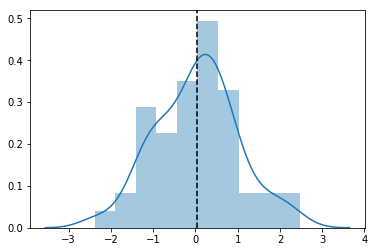

In [62]:
np.random.seed(4)
x = np.random.normal(size=100)

sns.distplot(x)
plt.axvline(np.mean(x), c='k', ls='--', label="sample mean")
plt.show()

2. 1번과 같이 100개의 숫자 생성 및 표본평균 계산을 50번 반복하여 50개의 표본평균을 구한다.

In [65]:
s_mean = []

for itr in range(0, 50):
    x = np.random.rand(100)
    s_mean.append(np.mean(x))
s_mean

[0.5050916370100321,
 0.4465007092615573,
 0.5368933136652568,
 0.5463745643597814,
 0.5437668178828186,
 0.5115063447637622,
 0.4634525535570064,
 0.514977735070771,
 0.4842642765058127,
 0.5115618335437234,
 0.485174360232771,
 0.489426893332671,
 0.4569604926483237,
 0.5002770420900902,
 0.4921597532406409,
 0.4834692065144288,
 0.5239467242029691,
 0.4781569916285363,
 0.4719253828959075,
 0.5211456220551285,
 0.5135526677270377,
 0.4617726246202174,
 0.5664714959261157,
 0.5125927521645661,
 0.5141711089127249,
 0.542194549675477,
 0.4831545689107836,
 0.48677335181907394,
 0.521972955453976,
 0.5037741219076515,
 0.5214946198449733,
 0.5162449881905552,
 0.5308807109065676,
 0.5036280368843616,
 0.44688554921546525,
 0.5578272263234979,
 0.4710622091488256,
 0.5125598160587918,
 0.4707022619647625,
 0.5002235409933349,
 0.5086263215006432,
 0.527200276549097,
 0.4979066173296151,
 0.514459880327975,
 0.4782746680926943,
 0.49050606626507387,
 0.5475596995020863,
 0.44904989943724

3. 2번에서 구한 50개의 표본평균의 히스토그램을 그리고 1번에서 구한 히스토그램과 겹쳐서 그린다.

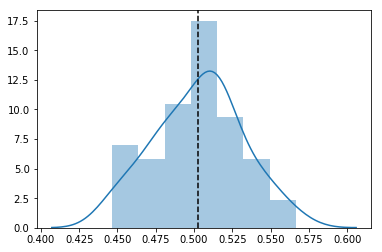

In [67]:
sns.distplot(s_mean)
plt.axvline(np.mean(s_mean), c='k', ls='--')